# Welcome to the Geogrid Tutorial for ATOC NWP!

September 14, 2021
Jay.Kong@colorado.edu


# 1.0 Load your data


This notebook assumes that your data is located in GEOGRID_DIR. This code uses xarray instead of wrf python.

In [2]:
# Make sure the environment is good ** especially important if running on another machines
import numpy
import cartopy
import matplotlib
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import matplotlib.style as style
import os

from netCDF4 import Dataset
from xarray import DataArray

print("Done importing modules")

Done importing modules


In [3]:
GEOGRID_DIRECTORY = "/projects/jiko1138/ICA_05"
lambert4040 = xr.open_dataset(GEOGRID_DIRECTORY+"/example1/geo_em.d01.nc")

<xarray.Dataset>
Dimensions:     (Time: 1, land_cat: 21, month: 12, soil_cat: 16, south_north: 60, south_north_stag: 61, west_east: 73, west_east_stag: 74)
Dimensions without coordinates: Time, land_cat, month, soil_cat, south_north, south_north_stag, west_east, west_east_stag
Data variables:
    Times       (Time) |S19 ...
    XLAT_M      (Time, south_north, west_east) float32 ...
    XLONG_M     (Time, south_north, west_east) float32 ...
    XLAT_V      (Time, south_north_stag, west_east) float32 ...
    XLONG_V     (Time, south_north_stag, west_east) float32 ...
    XLAT_U      (Time, south_north, west_east_stag) float32 ...
    XLONG_U     (Time, south_north, west_east_stag) float32 ...
    CLAT        (Time, south_north, west_east) float32 ...
    CLONG       (Time, south_north, west_east) float32 ...
    MAPFAC_M    (Time, south_north, west_east) float32 ...
    MAPFAC_V    (Time, south_north_stag, west_east) float32 ...
    MAPFAC_U    (Time, south_north, west_east_stag) float32

# 2.0 Check the max/min MAPFAC_M (compare to Tuesday numbers)


Let's verify the maximum and minimum values that you found with the NCO commands on Tuesday. Note that we could do this more elegantly using the attribute MAP_PROJ, but we'll just do it by hand now. 

In [3]:
print('Lambert4040:')
print(np.max(lambert4040['MAPFAC_M'].values[0, :, :]),np.min(lambert4040['MAPFAC_M'].values[0, :, :]))
print(np.max(lambert4040['XLAT_M'].values[0, :, :]),np.min(lambert4040['XLAT_M'].values[0, :, :]))

Lambert4040:
1.0317692 0.9662744
43.61373 23.909477


# 3.0 Contour plots of MAPFAC_M of the four projections


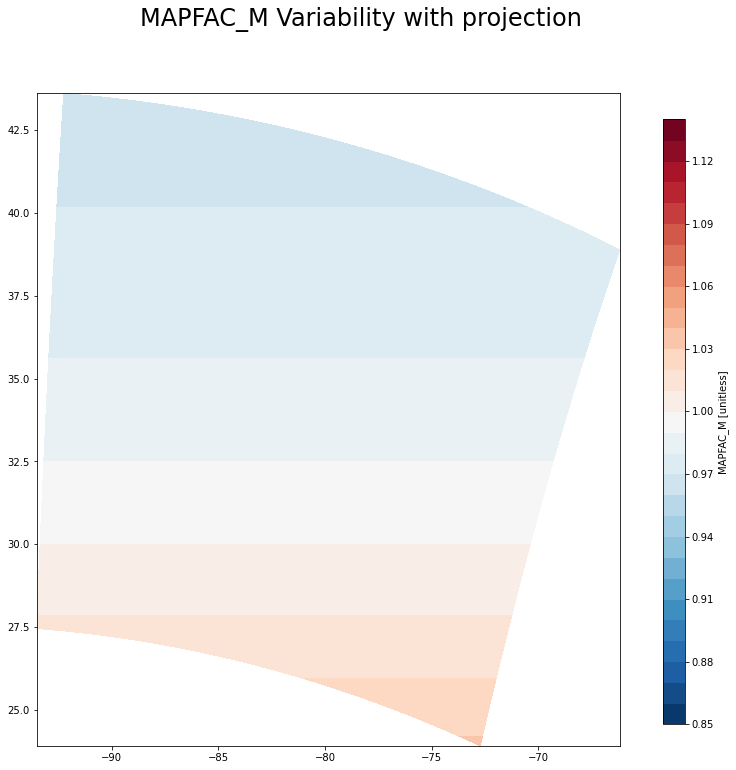

In [4]:
fig = plt.figure(figsize=(12,12))

c_levels = numpy.arange(0.85, 1.15, 0.01)

ax = plt.axes()
im = ax.contourf(lambert4040['XLONG_M'].values[0, :, :],
    lambert4040['XLAT_M'].values[0, :, :],
    lambert4040['MAPFAC_M'].values[0, :, :], c_levels,
    cmap=plt.cm.RdBu_r)

plt.suptitle("MAPFAC_M Variability with projection", fontsize=24)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.025, 0.7])
                                                                 
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label("MAPFAC_M [unitless]")

plt.show()

# 4.0 Contour plots of terrain height of the four projections

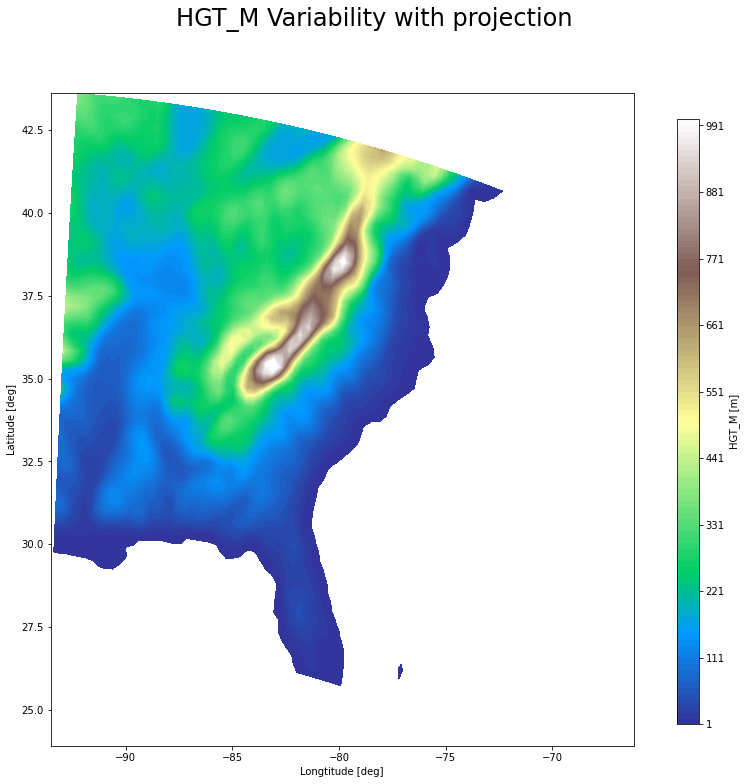

In [5]:
fig = plt.figure(figsize=(12,12))
c_levels = numpy.arange(1, 1002, 10)
# c_levels = numpy.arange(1, 110, 20)
           
ax = plt.axes()
im = ax.contourf(lambert4040['XLONG_M'].values[0, :, :],
    lambert4040['XLAT_M'].values[0, :, :],
    lambert4040['HGT_M'].values[0, :, :], c_levels,
    cmap=plt.cm.terrain)

plt.suptitle("HGT_M Variability with projection", fontsize=24)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.025, 0.7])
                                                                 
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label("HGT_M [m]")

ax.set_xlabel("Longtitude [deg]")
ax.set_ylabel("Latitude [deg]")

plt.savefig("HGT_M Variability with projection.png")
plt.savefig("HGT_M Variability with projection.pdf")
plt.show()

## 5.0 Contour plots of terrain height of different resolutions


Remember to change the directories for the directories that you used. Also, to see the differences between the resolutions more clearly, consider changing the axes ranges.

In [10]:
dx4km_nx400 = xr.open_dataset(GEOGRID_DIRECTORY+"lambert4040/geo_em.d01.nc")
dx16km_nx100 = xr.open_dataset(GEOGRID_DIRECTORY+"dx16km_nx100/geo_em.d01.nc")

#######
# here you should add other tests of geog_data_res 
dx32km_nx50 = xr.open_dataset(GEOGRID_DIRECTORY+"dx32km_nx50/geo_em.d01.nc")
dx2km_nx800 = xr.open_dataset(GEOGRID_DIRECTORY+"dx2km_nx800/geo_em.d01.nc")
dx1km_nx1600 = xr.open_dataset(GEOGRID_DIRECTORY+"dx1km_nx1600/geo_em.d01.nc")

32km:
3411.7222 166.5244


In [12]:
print('32km:',np.max(dx32km_nx50['HGT_M'].values[0, :, :]))

print('16km:',np.max(dx16km_nx100['HGT_M'].values[0, :, :]))

print('4km:',np.max(lambert4040['HGT_M'].values[0, :, :]))

print('2km:',np.max(dx2km_nx800['HGT_M'].values[0, :, :]))

print('1km:',np.max(dx1km_nx1600['HGT_M'].values[0, :, :]))

32km: 3411.7222
16km: 3610.213
4km: 3827.3018
2km: 4018.2183
1km: 4128.2344


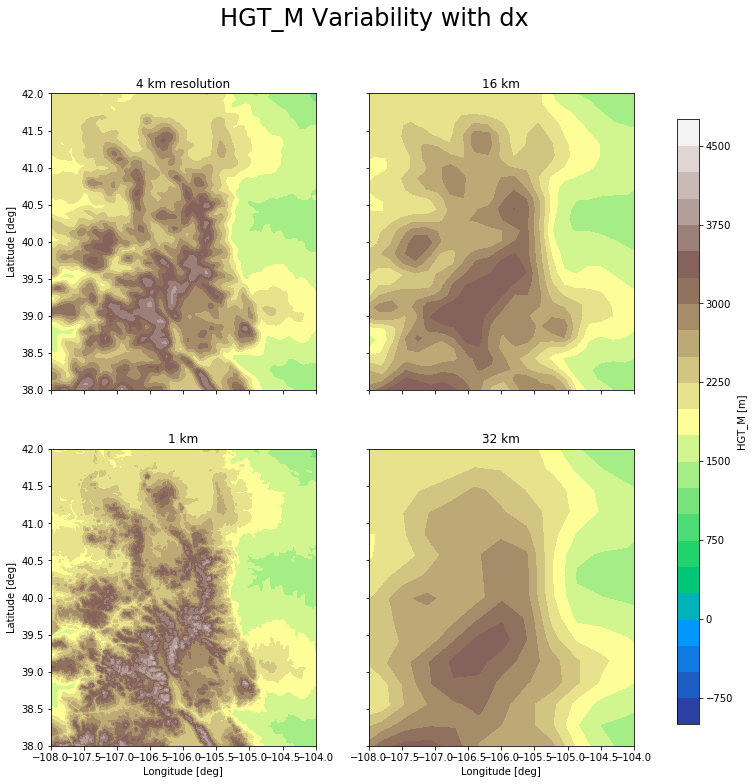

In [8]:
# Make a plot

fig, ax = plt.subplots(2,2,figsize=(12,12), sharex=True, sharey=True)
c_levels = numpy.arange(-1000, 5000, 250)
                                                                 
im = ax[0,0].contourf(dx4km_nx400['XLONG_M'].values[0, :, :],
    dx4km_nx400['XLAT_M'].values[0, :, :],
    dx4km_nx400['HGT_M'].values[0, :, :], c_levels,
    cmap=plt.cm.terrain)
ax[0,0].set_title("4 km resolution")

ax[0,1].contourf(dx16km_nx100['XLONG_M'].values[0, :, :],
    dx16km_nx100['XLAT_M'].values[0, :, :],
    dx16km_nx100['HGT_M'].values[0, :, :], c_levels,
    cmap=plt.cm.terrain)
ax[0,1].set_title("16 km")


######### Change these lines to point to other geog_data_res tests
ax[1,0].contourf(dx1km_nx1600['XLONG_M'].values[0, :, :],
    dx1km_nx1600['XLAT_M'].values[0, :, :],
    dx1km_nx1600['HGT_M'].values[0, :, :], c_levels,
    cmap=plt.cm.terrain)
ax[1,0].set_title("1 km")

ax[1,1].contourf(dx32km_nx50['XLONG_M'].values[0, :, :],
    dx32km_nx50['XLAT_M'].values[0, :, :],
    dx32km_nx50['HGT_M'].values[0, :, :], c_levels,
    cmap=plt.cm.terrain)
ax[1,1].set_title("32 km")

plt.suptitle("HGT_M Variability with dx", fontsize=24)


############ Change the extent of the maps
ax[0,0].set_ylim(38,42)
ax[0,0].set_xlim(-108,-104)

ax[0,0].set_ylabel("Latitude [deg]")
ax[1,0].set_ylabel("Latitude [deg]")
ax[1,0].set_xlabel("Longitude [deg]")
ax[1,1].set_xlabel("Longitude [deg]")


fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.025, 0.7])
                                                                 
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label("HGT_M [m]")

plt.show()

Choose a lat/long location and think about how its elevation changes as it's averaged with a larger and larger surrounding area...

In [61]:
GEOGRID_DIRECTORY = "/projects/jiko1138/ICA_05"

In [7]:
met_em1 = xr.open_dataset(GEOGRID_DIRECTORY + "/with_SST/met_em.d01.2005-08-28_00:00:00.nc")
met_em2 = xr.open_dataset(GEOGRID_DIRECTORY + "/with_SST/met_em.d01.2005-08-28_06:00:00.nc")
met_em3 = xr.open_dataset(GEOGRID_DIRECTORY + "/with_SST/met_em.d01.2005-08-28_12:00:00.nc")
met_em4 = xr.open_dataset(GEOGRID_DIRECTORY + "/with_SST/met_em.d01.2005-08-28_18:00:00.nc")
met_em5 = xr.open_dataset(GEOGRID_DIRECTORY + "/with_SST/met_em.d01.2005-08-29_00:00:00.nc")

In [8]:
print(met_em1)

<xarray.Dataset>
Dimensions:      (Time: 1, num_metgrid_levels: 27, num_sm_layers: 4, num_st_layers: 4, south_north: 69, south_north_stag: 70, west_east: 97, west_east_stag: 98, z-dimension0012: 12, z-dimension0016: 16, z-dimension0021: 21)
Dimensions without coordinates: Time, num_metgrid_levels, num_sm_layers, num_st_layers, south_north, south_north_stag, west_east, west_east_stag, z-dimension0012, z-dimension0016, z-dimension0021
Data variables:
    Times        (Time) |S19 ...
    PRES         (Time, num_metgrid_levels, south_north, west_east) float32 ...
    SOIL_LAYERS  (Time, num_st_layers, south_north, west_east) float32 ...
    SM           (Time, num_sm_layers, south_north, west_east) float32 ...
    ST           (Time, num_st_layers, south_north, west_east) float32 ...
    SST          (Time, south_north, west_east) float32 ...
    GHT          (Time, num_metgrid_levels, south_north, west_east) float32 ...
    SNOWH        (Time, south_north, west_east) float32 ...
    SNOW 

<xarray.DataArray 'SST' (Time: 1, south_north: 69, west_east: 97)>
array([[[302.5686 , 302.61795, ..., 301.796  , 301.77197],
        [302.53003, 302.56683, ..., 301.7772 , 301.75253],
        ...,
        [300.73093, 300.84744, ..., 301.56982, 301.51114],
        [300.55875, 300.68466, ..., 301.42383, 301.39542]]], dtype=float32)
Dimensions without coordinates: Time, south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    units:        K
    description:  Sea Surface Temperature
    stagger:      M
    sr_x:         1
    sr_y:         1


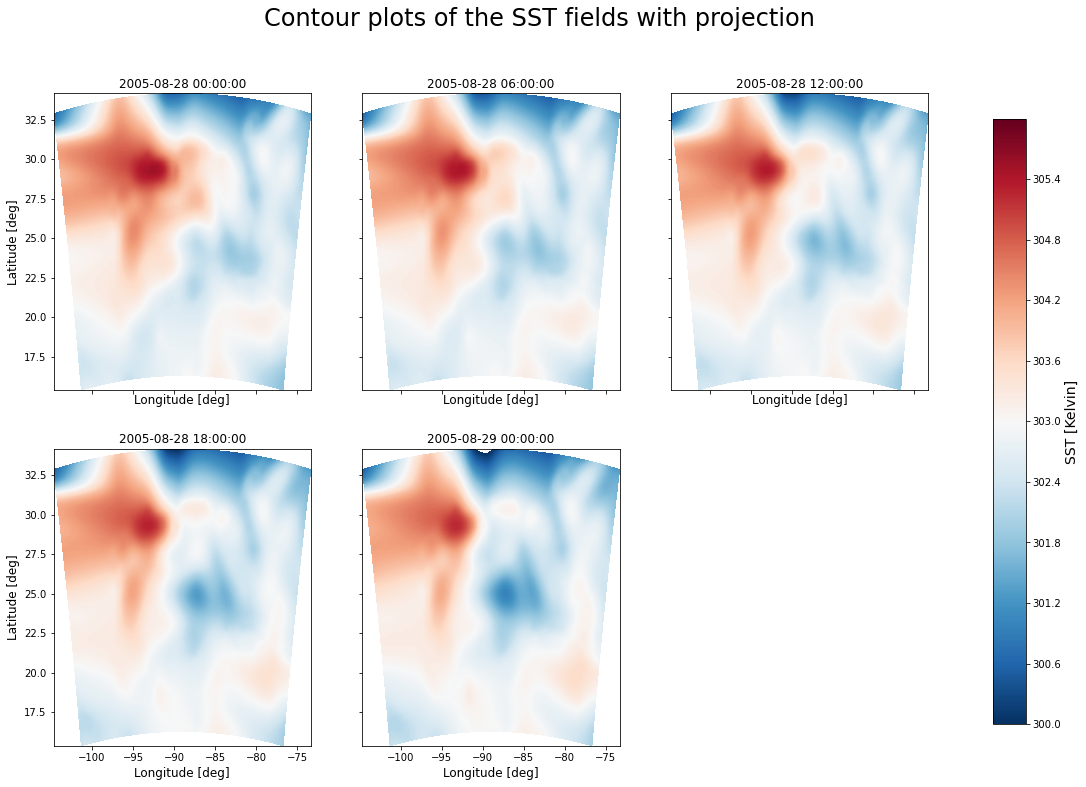

In [48]:
met_em1 = xr.open_dataset(GEOGRID_DIRECTORY + "/with_SST/met_em.d01.2005-08-28_00:00:00.nc")
met_em2 = xr.open_dataset(GEOGRID_DIRECTORY + "/with_SST/met_em.d01.2005-08-28_06:00:00.nc")
met_em3 = xr.open_dataset(GEOGRID_DIRECTORY + "/with_SST/met_em.d01.2005-08-28_12:00:00.nc")
met_em4 = xr.open_dataset(GEOGRID_DIRECTORY + "/with_SST/met_em.d01.2005-08-28_18:00:00.nc")
met_em5 = xr.open_dataset(GEOGRID_DIRECTORY + "/with_SST/met_em.d01.2005-08-29_00:00:00.nc")

fig, ax = plt.subplots(2,3,figsize=(18,12), sharex=True, sharey=True)

ax[-1, -1].axis('off')
print(met_em1['SST'])
c_levels = numpy.arange(300, 306, 0.01)
                                                                 
im = ax[0,0].contourf(met_em1['XLONG_M'].values[0, :, :],
    met_em1['XLAT_M'].values[0, :, :],
    met_em1['SST'].values[0, :, :], c_levels,
    cmap=plt.cm.RdBu_r)

ax[0,1].contourf(met_em2['XLONG_M'].values[0, :, :],
    met_em2['XLAT_M'].values[0, :, :],
    met_em2['SST'].values[0, :, :], c_levels,
    cmap=plt.cm.RdBu_r)

ax[0,2].contourf(met_em3['XLONG_M'].values[0, :, :],
    met_em3['XLAT_M'].values[0, :, :],
    met_em3['SST'].values[0, :, :], c_levels,
    cmap=plt.cm.RdBu_r)

ax[1,0].contourf(met_em4['XLONG_M'].values[0, :, :],
    met_em4['XLAT_M'].values[0, :, :],
    met_em4['SST'].values[0, :, :], c_levels,
    cmap=plt.cm.RdBu_r)

ax[1,1].contourf(met_em5['XLONG_M'].values[0, :, :],
    met_em5['XLAT_M'].values[0, :, :],
    met_em5['SST'].values[0, :, :], c_levels,
    cmap=plt.cm.RdBu_r)

plt.suptitle("Contour plots of the SST fields with projection", fontsize=24)

ax[0,0].set_ylabel("Latitude [deg]", fontsize=12)
ax[1,0].set_ylabel("Latitude [deg]", fontsize=12)

ax[0,0].set_xlabel("Longitude [deg]", fontsize=12)
ax[0,1].set_xlabel("Longitude [deg]", fontsize=12)
ax[0,2].set_xlabel("Longitude [deg]", fontsize=12)
ax[1,0].set_xlabel("Longitude [deg]", fontsize=12)
ax[1,1].set_xlabel("Longitude [deg]", fontsize=12)

ax[0,0].set_title("2005-08-28 00:00:00")
ax[0,1].set_title("2005-08-28 06:00:00")
ax[0,2].set_title("2005-08-28 12:00:00")
ax[1,0].set_title("2005-08-28 18:00:00")
ax[1,1].set_title("2005-08-29 00:00:00")

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.025, 0.7])                                                               
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label("SST [Kelvin]", fontsize=14)

plt.savefig("Contour plots of the SST fields with projection.png")
plt.savefig("Contour plots of the SST fields with projection.pdf")

plt.show()

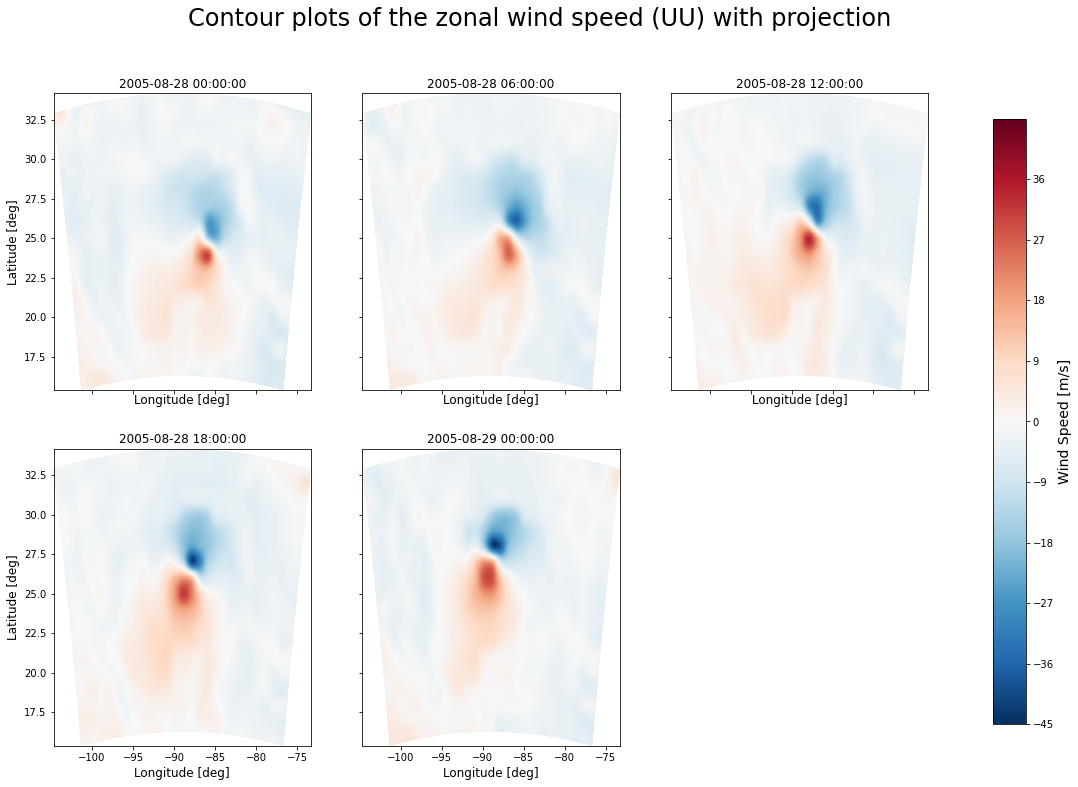

In [140]:
met_em1 = xr.open_dataset(GEOGRID_DIRECTORY + "/with_SST/met_em.d01.2005-08-28_00:00:00.nc")
met_em2 = xr.open_dataset(GEOGRID_DIRECTORY + "/with_SST/met_em.d01.2005-08-28_06:00:00.nc")
met_em3 = xr.open_dataset(GEOGRID_DIRECTORY + "/with_SST/met_em.d01.2005-08-28_12:00:00.nc")
met_em4 = xr.open_dataset(GEOGRID_DIRECTORY + "/with_SST/met_em.d01.2005-08-28_18:00:00.nc")
met_em5 = xr.open_dataset(GEOGRID_DIRECTORY + "/with_SST/met_em.d01.2005-08-29_00:00:00.nc")

fig, ax = plt.subplots(2,3,figsize=(18,12), sharex=True, sharey=True)

ax[-1, -1].axis('off')

c_levels = numpy.arange(-45, 45, 0.1)
    
im = ax[0,0].contourf(met_em1['XLONG_M'].values[0, :, :],
    met_em1['XLAT_M'].values[0, :, :],
    met_em1['UU'].values[0, 0, :, 0:97], c_levels,
    cmap=plt.cm.RdBu_r)

ax[0,1].contourf(met_em2['XLONG_M'].values[0, :, :],
    met_em2['XLAT_M'].values[0, :, :],
    met_em2['UU'].values[0, 0, :, 0:97], c_levels,
    cmap=plt.cm.RdBu_r)

ax[0,2].contourf(met_em3['XLONG_M'].values[0, :, :],
    met_em3['XLAT_M'].values[0, :, :],
    met_em3['UU'].values[0, 0, :, 0:97], c_levels,
    cmap=plt.cm.RdBu_r)

ax[1,0].contourf(met_em4['XLONG_M'].values[0, :, :],
    met_em4['XLAT_M'].values[0, :, :],
    met_em4['UU'].values[0, 0, :, 0:97], c_levels,
    cmap=plt.cm.RdBu_r)

ax[1,1].contourf(met_em5['XLONG_M'].values[0, :, :],
    met_em5['XLAT_M'].values[0, :, :],
    met_em5['UU'].values[0, 0, :, 0:97], c_levels,
    cmap=plt.cm.RdBu_r)

plt.suptitle("Contour plots of the zonal wind speed (UU) with projection", fontsize=24)

ax[0,0].set_ylabel("Latitude [deg]", fontsize=12)
ax[1,0].set_ylabel("Latitude [deg]", fontsize=12)

ax[0,0].set_xlabel("Longitude [deg]", fontsize=12)
ax[0,1].set_xlabel("Longitude [deg]", fontsize=12)
ax[0,2].set_xlabel("Longitude [deg]", fontsize=12)
ax[1,0].set_xlabel("Longitude [deg]", fontsize=12)
ax[1,1].set_xlabel("Longitude [deg]", fontsize=12)

ax[0,0].set_title("2005-08-28 00:00:00")
ax[0,1].set_title("2005-08-28 06:00:00")
ax[0,2].set_title("2005-08-28 12:00:00")
ax[1,0].set_title("2005-08-28 18:00:00")
ax[1,1].set_title("2005-08-29 00:00:00")

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.025, 0.7])                                                               
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label("Wind Speed [m/s]", fontsize=14)

# plt.savefig("Contour plots of the SST fields with projection.png")
# plt.savefig("Contour plots of the SST fields with projection.pdf")

plt.show()

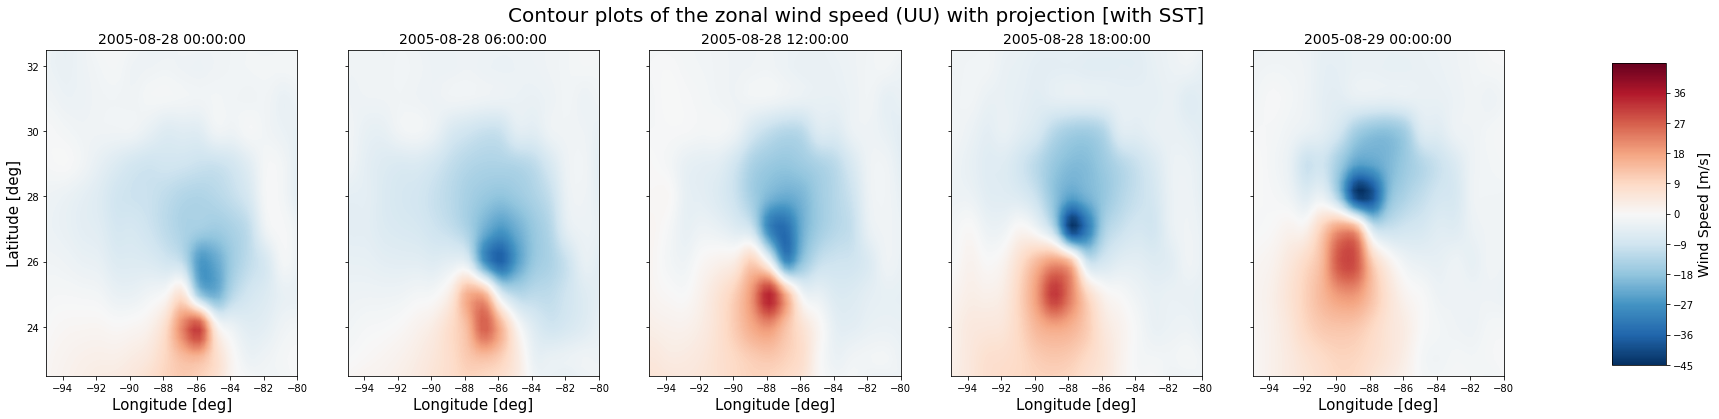

In [163]:
met_em1 = xr.open_dataset(GEOGRID_DIRECTORY + "/with_SST/met_em.d01.2005-08-28_00:00:00.nc")
met_em2 = xr.open_dataset(GEOGRID_DIRECTORY + "/with_SST/met_em.d01.2005-08-28_06:00:00.nc")
met_em3 = xr.open_dataset(GEOGRID_DIRECTORY + "/with_SST/met_em.d01.2005-08-28_12:00:00.nc")
met_em4 = xr.open_dataset(GEOGRID_DIRECTORY + "/with_SST/met_em.d01.2005-08-28_18:00:00.nc")
met_em5 = xr.open_dataset(GEOGRID_DIRECTORY + "/with_SST/met_em.d01.2005-08-29_00:00:00.nc")

fig, ax = plt.subplots(1,5,figsize=(30,6), sharex=True, sharey=True)

MAP_BOUNDS = [-95, -80, 22.5, 32.5]

ax[1].set_xlim([-95, -80])
ax[1].set_ylim([22.5, 32.5])

ax[2].set_xlim([-95, -80])
ax[2].set_ylim([22.5, 32.5])

ax[3].set_xlim([-95, -80])
ax[3].set_ylim([22.5, 32.5])

ax[4].set_xlim([-95, -80])
ax[4].set_ylim([22.5, 32.5])

ax[0].set_xlim([-95, -80])
ax[0].set_ylim([22.5, 32.5])

c_levels = numpy.arange(-45, 45, 0.1)
    
im = ax[0].contourf(met_em1['XLONG_M'].values[0, :, :],
    met_em1['XLAT_M'].values[0, :, :],
    met_em1['UU'].values[0, 0, :, 0:97], c_levels,
    cmap=plt.cm.RdBu_r)

ax[1].contourf(met_em2['XLONG_M'].values[0, :, :],
    met_em2['XLAT_M'].values[0, :, :],
    met_em2['UU'].values[0, 0, :, 0:97], c_levels,
    cmap=plt.cm.RdBu_r)

ax[2].contourf(met_em3['XLONG_M'].values[0, :, :],
    met_em3['XLAT_M'].values[0, :, :],
    met_em3['UU'].values[0, 0, :, 0:97], c_levels,
    cmap=plt.cm.RdBu_r)

ax[3].contourf(met_em4['XLONG_M'].values[0, :, :],
    met_em4['XLAT_M'].values[0, :, :],
    met_em4['UU'].values[0, 0, :, 0:97], c_levels,
    cmap=plt.cm.RdBu_r)

ax[4].contourf(met_em5['XLONG_M'].values[0, :, :],
    met_em5['XLAT_M'].values[0, :, :],
    met_em5['UU'].values[0, 0, :, 0:97], c_levels,
    cmap=plt.cm.RdBu_r)

plt.suptitle("Contour plots of the zonal wind speed (UU) with projection [with SST]", fontsize=20)

ax[0].set_ylabel("Latitude [deg]", fontsize=15)

ax[0].set_xlabel("Longitude [deg]", fontsize=15)
ax[1].set_xlabel("Longitude [deg]", fontsize=15)
ax[2].set_xlabel("Longitude [deg]", fontsize=15)
ax[3].set_xlabel("Longitude [deg]", fontsize=15)
ax[4].set_xlabel("Longitude [deg]", fontsize=15)

ax[0].set_title("2005-08-28 00:00:00", fontsize=14)
ax[1].set_title("2005-08-28 06:00:00", fontsize=14)
ax[2].set_title("2005-08-28 12:00:00", fontsize=14)
ax[3].set_title("2005-08-28 18:00:00", fontsize=14)
ax[4].set_title("2005-08-29 00:00:00", fontsize=14)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.025, 0.7])                                                               
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label("Wind Speed [m/s]", fontsize=14)

plt.savefig("1.png")

plt.show()

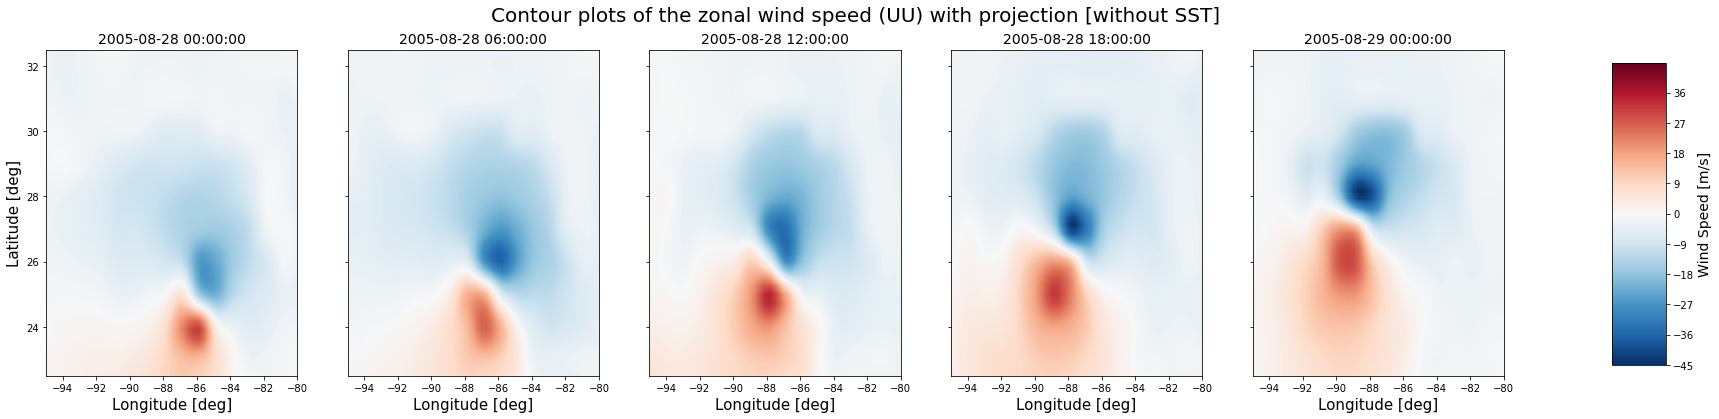

In [164]:
met_em1 = xr.open_dataset(GEOGRID_DIRECTORY + "/without_SST/met_em.d01.2005-08-28_00:00:00.nc")
met_em2 = xr.open_dataset(GEOGRID_DIRECTORY + "/without_SST/met_em.d01.2005-08-28_06:00:00.nc")
met_em3 = xr.open_dataset(GEOGRID_DIRECTORY + "/without_SST/met_em.d01.2005-08-28_12:00:00.nc")
met_em4 = xr.open_dataset(GEOGRID_DIRECTORY + "/without_SST/met_em.d01.2005-08-28_18:00:00.nc")
met_em5 = xr.open_dataset(GEOGRID_DIRECTORY + "/without_SST/met_em.d01.2005-08-29_00:00:00.nc")

fig, ax = plt.subplots(1,5,figsize=(30,6), sharex=True, sharey=True)

ax[1].set_xlim([-95, -80])
ax[1].set_ylim([22.5, 32.5])

ax[2].set_xlim([-95, -80])
ax[2].set_ylim([22.5, 32.5])

ax[3].set_xlim([-95, -80])
ax[3].set_ylim([22.5, 32.5])

ax[4].set_xlim([-95, -80])
ax[4].set_ylim([22.5, 32.5])

ax[0].set_xlim([-95, -80])
ax[0].set_ylim([22.5, 32.5])


c_levels = numpy.arange(-45, 45, 0.1)
    
im = ax[0].contourf(met_em1['XLONG_M'].values[0, :, :],
    met_em1['XLAT_M'].values[0, :, :],
    met_em1['UU'].values[0, 0, :, 0:97], c_levels,
    cmap=plt.cm.RdBu_r)

ax[1].contourf(met_em2['XLONG_M'].values[0, :, :],
    met_em2['XLAT_M'].values[0, :, :],
    met_em2['UU'].values[0, 0, :, 0:97], c_levels,
    cmap=plt.cm.RdBu_r)

ax[2].contourf(met_em3['XLONG_M'].values[0, :, :],
    met_em3['XLAT_M'].values[0, :, :],
    met_em3['UU'].values[0, 0, :, 0:97], c_levels,
    cmap=plt.cm.RdBu_r)

ax[3].contourf(met_em4['XLONG_M'].values[0, :, :],
    met_em4['XLAT_M'].values[0, :, :],
    met_em4['UU'].values[0, 0, :, 0:97], c_levels,
    cmap=plt.cm.RdBu_r)

ax[4].contourf(met_em5['XLONG_M'].values[0, :, :],
    met_em5['XLAT_M'].values[0, :, :],
    met_em5['UU'].values[0, 0, :, 0:97], c_levels,
    cmap=plt.cm.RdBu_r)

plt.suptitle("Contour plots of the zonal wind speed (UU) with projection [without SST]", fontsize=20)

ax[0].set_ylabel("Latitude [deg]", fontsize=15)

ax[0].set_xlabel("Longitude [deg]", fontsize=15)
ax[1].set_xlabel("Longitude [deg]", fontsize=15)
ax[2].set_xlabel("Longitude [deg]", fontsize=15)
ax[3].set_xlabel("Longitude [deg]", fontsize=15)
ax[4].set_xlabel("Longitude [deg]", fontsize=15)

ax[0].set_title("2005-08-28 00:00:00", fontsize=14)
ax[1].set_title("2005-08-28 06:00:00", fontsize=14)
ax[2].set_title("2005-08-28 12:00:00", fontsize=14)
ax[3].set_title("2005-08-28 18:00:00", fontsize=14)
ax[4].set_title("2005-08-29 00:00:00", fontsize=14)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.025, 0.7])                                                               
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label("Wind Speed [m/s]", fontsize=14)

plt.savefig("2.png")

plt.show()

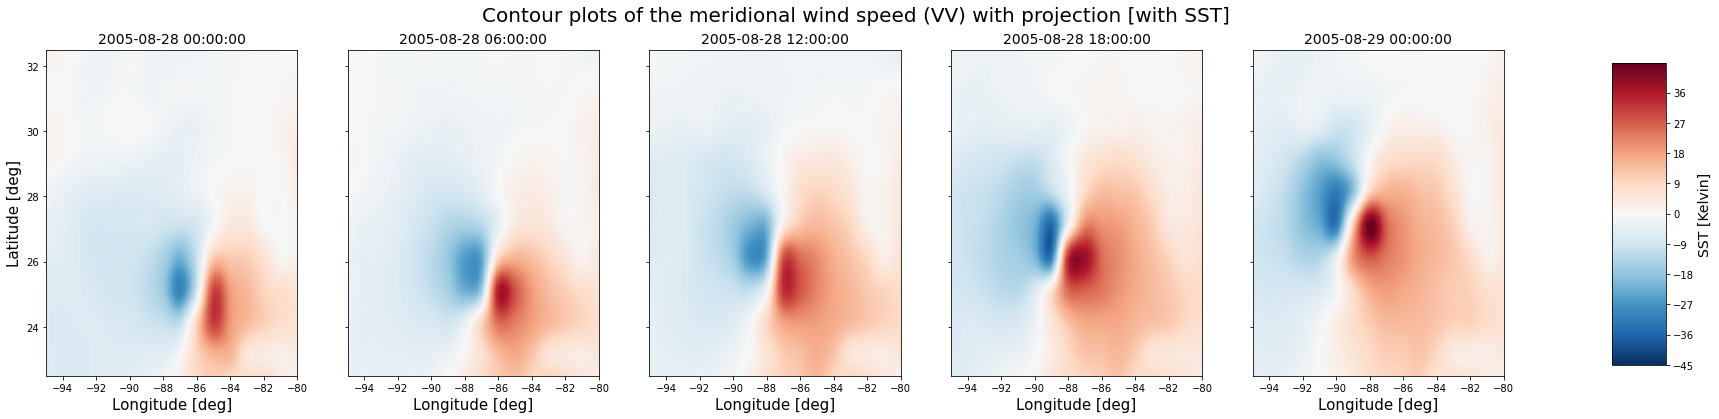

In [165]:
met_em1 = xr.open_dataset(GEOGRID_DIRECTORY + "/with_SST/met_em.d01.2005-08-28_00:00:00.nc")
met_em2 = xr.open_dataset(GEOGRID_DIRECTORY + "/with_SST/met_em.d01.2005-08-28_06:00:00.nc")
met_em3 = xr.open_dataset(GEOGRID_DIRECTORY + "/with_SST/met_em.d01.2005-08-28_12:00:00.nc")
met_em4 = xr.open_dataset(GEOGRID_DIRECTORY + "/with_SST/met_em.d01.2005-08-28_18:00:00.nc")
met_em5 = xr.open_dataset(GEOGRID_DIRECTORY + "/with_SST/met_em.d01.2005-08-29_00:00:00.nc")

fig, ax = plt.subplots(1,5,figsize=(30,6), sharex=True, sharey=True)

c_levels = numpy.arange(-45, 45, 0.1)

ax[1].set_xlim([-95, -80])
ax[1].set_ylim([22.5, 32.5])

ax[2].set_xlim([-95, -80])
ax[2].set_ylim([22.5, 32.5])

ax[3].set_xlim([-95, -80])
ax[3].set_ylim([22.5, 32.5])

ax[4].set_xlim([-95, -80])
ax[4].set_ylim([22.5, 32.5])

ax[0].set_xlim([-95, -80])
ax[0].set_ylim([22.5, 32.5])
    
im = ax[0].contourf(met_em1['XLONG_M'].values[0, :, :],
    met_em1['XLAT_M'].values[0, :, :],
    met_em1['VV'].values[0, 0, 0:69, 0:97], c_levels,
    cmap=plt.cm.RdBu_r)

ax[1].contourf(met_em2['XLONG_M'].values[0, :, :],
    met_em2['XLAT_M'].values[0, :, :],
    met_em2['VV'].values[0, 0, 0:69, 0:97], c_levels,
    cmap=plt.cm.RdBu_r)

ax[2].contourf(met_em3['XLONG_M'].values[0, :, :],
    met_em3['XLAT_M'].values[0, :, :],
    met_em3['VV'].values[0, 0, 0:69, 0:97], c_levels,
    cmap=plt.cm.RdBu_r)

ax[3].contourf(met_em4['XLONG_M'].values[0, :, :],
    met_em4['XLAT_M'].values[0, :, :],
    met_em4['VV'].values[0, 0, 0:69, 0:97], c_levels,
    cmap=plt.cm.RdBu_r)

ax[4].contourf(met_em5['XLONG_M'].values[0, :, :],
    met_em5['XLAT_M'].values[0, :, :],
    met_em5['VV'].values[0, 0, 0:69, 0:97], c_levels,
    cmap=plt.cm.RdBu_r)

plt.suptitle("Contour plots of the meridional wind speed (VV) with projection [with SST]", fontsize=20)

ax[0].set_ylabel("Latitude [deg]", fontsize=15)

ax[0].set_xlabel("Longitude [deg]", fontsize=15)
ax[1].set_xlabel("Longitude [deg]", fontsize=15)
ax[2].set_xlabel("Longitude [deg]", fontsize=15)
ax[3].set_xlabel("Longitude [deg]", fontsize=15)
ax[4].set_xlabel("Longitude [deg]", fontsize=15)

ax[0].set_title("2005-08-28 00:00:00", fontsize=14)
ax[1].set_title("2005-08-28 06:00:00", fontsize=14)
ax[2].set_title("2005-08-28 12:00:00", fontsize=14)
ax[3].set_title("2005-08-28 18:00:00", fontsize=14)
ax[4].set_title("2005-08-29 00:00:00", fontsize=14)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.025, 0.7])                                                               
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label("SST [Kelvin]", fontsize=14)

plt.savefig("3.png")

plt.show()

In [ ]:
met_em1 = xr.open_dataset(GEOGRID_DIRECTORY + "/without_SST/met_em.d01.2005-08-28_00:00:00.nc")
met_em2 = xr.open_dataset(GEOGRID_DIRECTORY + "/without_SST/met_em.d01.2005-08-28_06:00:00.nc")
met_em3 = xr.open_dataset(GEOGRID_DIRECTORY + "/without_SST/met_em.d01.2005-08-28_12:00:00.nc")
met_em4 = xr.open_dataset(GEOGRID_DIRECTORY + "/without_SST/met_em.d01.2005-08-28_18:00:00.nc")
met_em5 = xr.open_dataset(GEOGRID_DIRECTORY + "/without_SST/met_em.d01.2005-08-29_00:00:00.nc")

fig, ax = plt.subplots(1,5,figsize=(30,6), sharex=True, sharey=True)

c_levels = numpy.arange(-45, 45, 0.1)

ax[1].set_xlim([-95, -80])
ax[1].set_ylim([22.5, 32.5])

ax[2].set_xlim([-95, -80])
ax[2].set_ylim([22.5, 32.5])

ax[3].set_xlim([-95, -80])
ax[3].set_ylim([22.5, 32.5])

ax[4].set_xlim([-95, -80])
ax[4].set_ylim([22.5, 32.5])

ax[0].set_xlim([-95, -80])
ax[0].set_ylim([22.5, 32.5])
    
im = ax[0].contourf(met_em1['XLONG_M'].values[0, :, :],
    met_em1['XLAT_M'].values[0, :, :],
    met_em1['VV'].values[0, 0, 0:69, 0:97], c_levels,
    cmap=plt.cm.RdBu_r)

ax[1].contourf(met_em2['XLONG_M'].values[0, :, :],
    met_em2['XLAT_M'].values[0, :, :],
    met_em2['VV'].values[0, 0, 0:69, 0:97], c_levels,
    cmap=plt.cm.RdBu_r)

ax[2].contourf(met_em3['XLONG_M'].values[0, :, :],
    met_em3['XLAT_M'].values[0, :, :],
    met_em3['VV'].values[0, 0, 0:69, 0:97], c_levels,
    cmap=plt.cm.RdBu_r)

ax[3].contourf(met_em4['XLONG_M'].values[0, :, :],
    met_em4['XLAT_M'].values[0, :, :],
    met_em4['VV'].values[0, 0, 0:69, 0:97], c_levels,
    cmap=plt.cm.RdBu_r)

ax[4].contourf(met_em5['XLONG_M'].values[0, :, :],
    met_em5['XLAT_M'].values[0, :, :],
    met_em5['VV'].values[0, 0, 0:69, 0:97], c_levels,
    cmap=plt.cm.RdBu_r)

plt.suptitle("Contour plots of the meridional wind speed (VV) with projection [without SST]", fontsize=20)

ax[0].set_ylabel("Latitude [deg]", fontsize=15)

ax[0].set_xlabel("Longitude [deg]", fontsize=15)
ax[1].set_xlabel("Longitude [deg]", fontsize=15)
ax[2].set_xlabel("Longitude [deg]", fontsize=15)
ax[3].set_xlabel("Longitude [deg]", fontsize=15)
ax[4].set_xlabel("Longitude [deg]", fontsize=15)

ax[0].set_title("2005-08-28 00:00:00", fontsize=14)
ax[1].set_title("2005-08-28 06:00:00", fontsize=14)
ax[2].set_title("2005-08-28 12:00:00", fontsize=14)
ax[3].set_title("2005-08-28 18:00:00", fontsize=14)
ax[4].set_title("2005-08-29 00:00:00", fontsize=14)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.025, 0.7])                                                               
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label("SST [Kelvin]", fontsize=14)

plt.savefig("4.png")

plt.show()

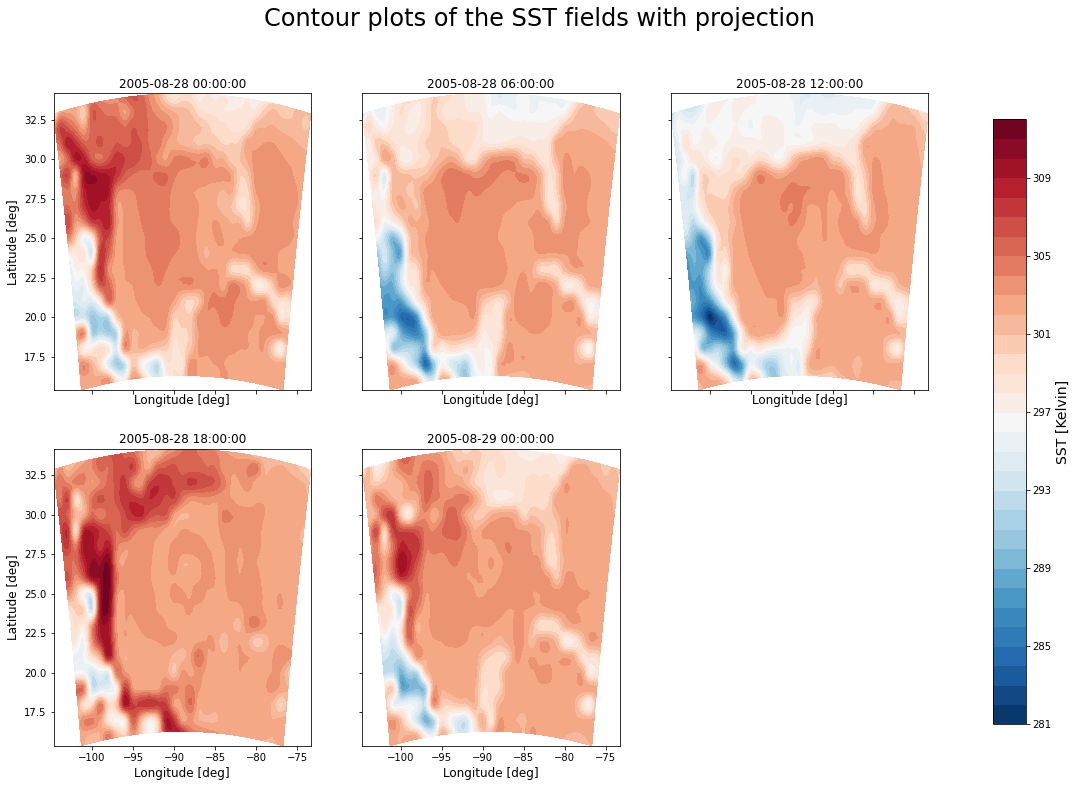

In [122]:
met_em1 = xr.open_dataset(GEOGRID_DIRECTORY + "/with_SST/met_em.d01.2005-08-28_00:00:00.nc")
met_em2 = xr.open_dataset(GEOGRID_DIRECTORY + "/with_SST/met_em.d01.2005-08-28_06:00:00.nc")
met_em3 = xr.open_dataset(GEOGRID_DIRECTORY + "/with_SST/met_em.d01.2005-08-28_12:00:00.nc")
met_em4 = xr.open_dataset(GEOGRID_DIRECTORY + "/with_SST/met_em.d01.2005-08-28_18:00:00.nc")
met_em5 = xr.open_dataset(GEOGRID_DIRECTORY + "/with_SST/met_em.d01.2005-08-29_00:00:00.nc")

fig, ax = plt.subplots(2,3,figsize=(18,12), sharex=True, sharey=True)

ax[-1, -1].axis('off')

c_levels = numpy.arange(281, 313, 1)
                                                                 
im = ax[0,0].contourf(met_em1['XLONG_M'].values[0, :, :],
    met_em1['XLAT_M'].values[0, :, :],
    met_em1['TT'].values[0, 0, :, :], c_levels,
    cmap=plt.cm.RdBu_r)

ax[0,1].contourf(met_em2['XLONG_M'].values[0, :, :],
    met_em2['XLAT_M'].values[0, :, :],
    met_em2['TT'].values[0, 0, :, :], c_levels,
    cmap=plt.cm.RdBu_r)

ax[0,2].contourf(met_em3['XLONG_M'].values[0, :, :],
    met_em3['XLAT_M'].values[0, :, :],
    met_em3['TT'].values[0, 0, :, :], c_levels,
    cmap=plt.cm.RdBu_r)

ax[1,0].contourf(met_em4['XLONG_M'].values[0, :, :],
    met_em4['XLAT_M'].values[0, :, :],
    met_em4['TT'].values[0, 0, :, :], c_levels,
    cmap=plt.cm.RdBu_r)

ax[1,1].contourf(met_em5['XLONG_M'].values[0, :, :],
    met_em5['XLAT_M'].values[0, :, :],
    met_em5['TT'].values[0, 0, :, :], c_levels,
    cmap=plt.cm.RdBu_r)

plt.suptitle("Contour plots of the SST fields with projection", fontsize=24)

ax[0,0].set_ylabel("Latitude [deg]", fontsize=12)
ax[1,0].set_ylabel("Latitude [deg]", fontsize=12)

ax[0,0].set_xlabel("Longitude [deg]", fontsize=12)
ax[0,1].set_xlabel("Longitude [deg]", fontsize=12)
ax[0,2].set_xlabel("Longitude [deg]", fontsize=12)
ax[1,0].set_xlabel("Longitude [deg]", fontsize=12)
ax[1,1].set_xlabel("Longitude [deg]", fontsize=12)

ax[0,0].set_title("2005-08-28 00:00:00")
ax[0,1].set_title("2005-08-28 06:00:00")
ax[0,2].set_title("2005-08-28 12:00:00")
ax[1,0].set_title("2005-08-28 18:00:00")
ax[1,1].set_title("2005-08-29 00:00:00")

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.025, 0.7])                                                               
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label("SST [Kelvin]", fontsize=14)

# plt.savefig("Contour plots of the SST fields with projection.png")
# plt.savefig("Contour plots of the SST fields with projection.pdf")

plt.show()

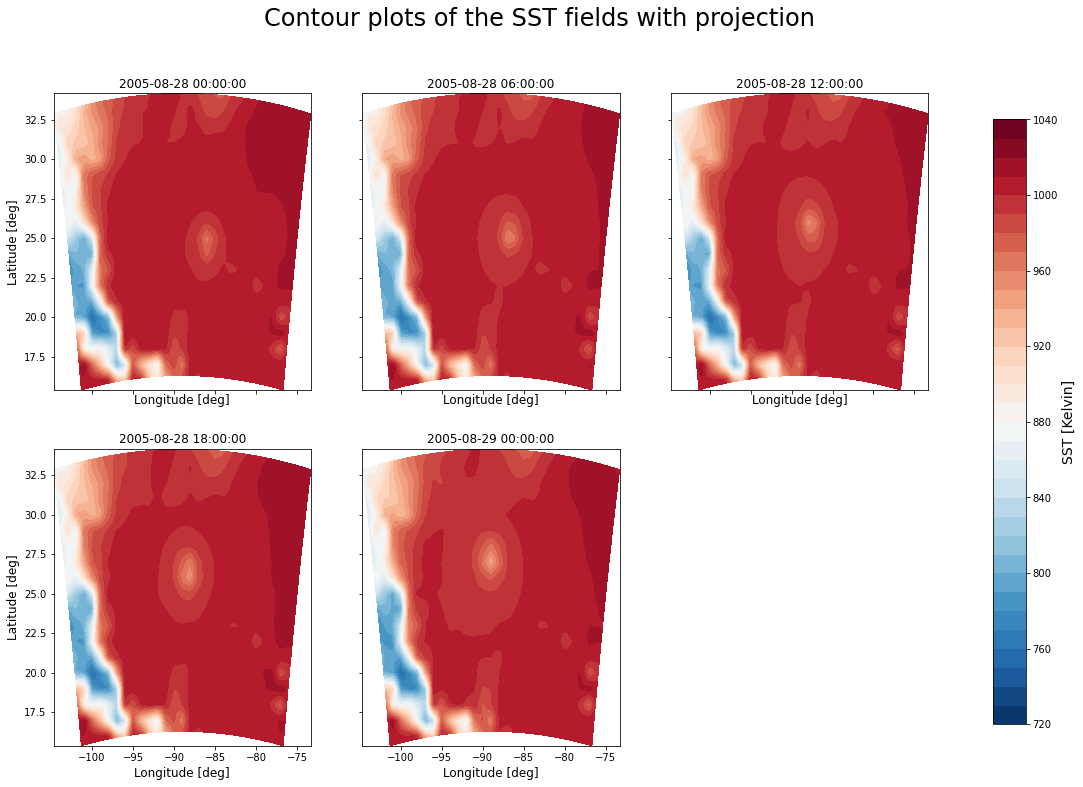

In [124]:
met_em1 = xr.open_dataset(GEOGRID_DIRECTORY + "/with_SST/met_em.d01.2005-08-28_00:00:00.nc")
met_em2 = xr.open_dataset(GEOGRID_DIRECTORY + "/with_SST/met_em.d01.2005-08-28_06:00:00.nc")
met_em3 = xr.open_dataset(GEOGRID_DIRECTORY + "/with_SST/met_em.d01.2005-08-28_12:00:00.nc")
met_em4 = xr.open_dataset(GEOGRID_DIRECTORY + "/with_SST/met_em.d01.2005-08-28_18:00:00.nc")
met_em5 = xr.open_dataset(GEOGRID_DIRECTORY + "/with_SST/met_em.d01.2005-08-29_00:00:00.nc")

fig, ax = plt.subplots(2,3,figsize=(18,12), sharex=True, sharey=True)

ax[-1, -1].axis('off')

c_levels = numpy.arange(720, 1050, 10)
                                                                 
im = ax[0,0].contourf(met_em1['XLONG_M'].values[0, :, :],
    met_em1['XLAT_M'].values[0, :, :],
    (met_em1['PSFC']/100).values[0, :, :], c_levels,
    cmap=plt.cm.RdBu_r)

ax[0,1].contourf(met_em2['XLONG_M'].values[0, :, :],
    met_em2['XLAT_M'].values[0, :, :],
    (met_em2['PSFC']/100).values[0, :, :], c_levels,
    cmap=plt.cm.RdBu_r)

ax[0,2].contourf(met_em3['XLONG_M'].values[0, :, :],
    met_em3['XLAT_M'].values[0, :, :],
    (met_em3['PSFC']/100).values[0, :, :], c_levels,
    cmap=plt.cm.RdBu_r)

ax[1,0].contourf(met_em4['XLONG_M'].values[0, :, :],
    met_em4['XLAT_M'].values[0, :, :],
    (met_em4['PSFC']/100).values[0, :, :], c_levels,
    cmap=plt.cm.RdBu_r)

ax[1,1].contourf(met_em5['XLONG_M'].values[0, :, :],
    met_em5['XLAT_M'].values[0, :, :],
    (met_em5['PSFC']/100).values[0, :, :], c_levels,
    cmap=plt.cm.RdBu_r)

plt.suptitle("Contour plots of the SST fields with projection", fontsize=24)

ax[0,0].set_ylabel("Latitude [deg]", fontsize=12)
ax[1,0].set_ylabel("Latitude [deg]", fontsize=12)

ax[0,0].set_xlabel("Longitude [deg]", fontsize=12)
ax[0,1].set_xlabel("Longitude [deg]", fontsize=12)
ax[0,2].set_xlabel("Longitude [deg]", fontsize=12)
ax[1,0].set_xlabel("Longitude [deg]", fontsize=12)
ax[1,1].set_xlabel("Longitude [deg]", fontsize=12)

ax[0,0].set_title("2005-08-28 00:00:00")
ax[0,1].set_title("2005-08-28 06:00:00")
ax[0,2].set_title("2005-08-28 12:00:00")
ax[1,0].set_title("2005-08-28 18:00:00")
ax[1,1].set_title("2005-08-29 00:00:00")

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.025, 0.7])                                                               
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label("SST [Kelvin]", fontsize=14)

# plt.savefig("Contour plots of the SST fields with projection.png")
# plt.savefig("Contour plots of the SST fields with projection.pdf")

plt.show()